In [52]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
from lmfit import Model,Parameter,Parameters
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import norm
import os
from functions import plot_preprocessed_dist,plot_track_characteristics,mmsd_plot,cutoff_function,msd,data_pool,two_distributions_plot,partition,ecdf,kolmogorov_smirnov,compute_mean_intensity_map,KS_MAP,KS_MAP_2SAMP
from celluloid import Camera
from scipy.stats import kde
import SeabornFig2Grid as sfg

%matplotlib inline
%reload_ext autoreload

# What happens when we change the number of points for the fit of the MSD? 


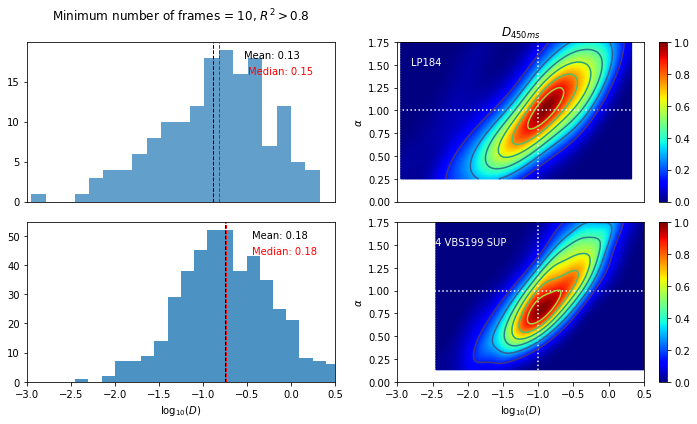

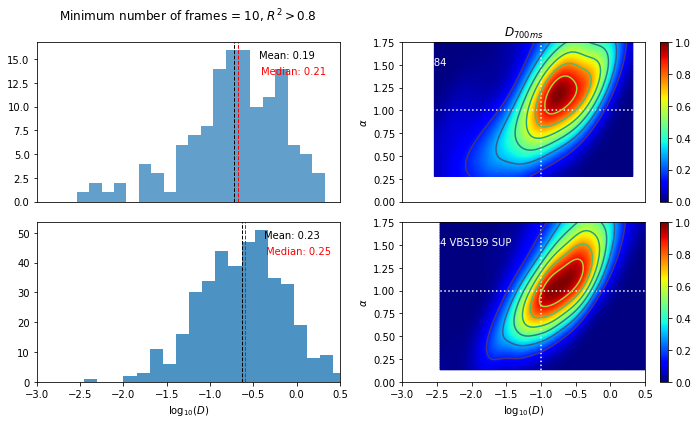

In [53]:
maxframe=500
minframe=10
r2 = 0.8
dt = 0.05

points = [10,15]
#files1 = ["Data/SM1/sm1_ld400.csv","Data/SM2/sm2_ld400.csv","Data/SM3/sm3_ld400.csv","Data/SM4/sm4_ld400.csv","Data/SM5/sm5_ld400.csv","Data/SM6/sm6_ld400.csv","Data/SM7/sm7_ld400.csv","Data/SM8/sm8_ld400.csv","Data/SM9/sm9_ld400.csv","Data/SM10/sm10_ld400.csv"]
#files2 = ["Data/SM1_WNT/sm1_wnt_ld400.csv","Data/SM2_WNT/sm2_wnt_ld400.csv","Data/SM3_WNT/sm3_wnt_ld400.csv","Data/SM4_WNT/sm4_wnt_ld400.csv","Data/SM5_WNT/sm5_wnt_ld400.csv","Data/SM6_WNT/sm6_wnt_ld400.csv","Data/SM7_WNT/sm7_wnt_ld400.csv","Data/SM8_WNT/sm8_wnt_ld400.csv","Data/SM10_WNT/sm10_wnt_ld400.csv"]
files1 = ["Data/SM1/sm1_ld400.csv","Data/SM2/sm2_ld400.csv"]
files2 = ["Data/SM1_WNT/sm1_wnt_ld400.csv","Data/SM2_WNT/sm2_wnt_ld400.csv"]


for pt in points:
    
    DATA = data_pool(files1,dt,minframe,maxframe,r2,fit_option=pt)

    logD = []
    A = []
    for k in range(np.shape(DATA)[0]):
        logD.append(np.log10(DATA[k][1]))
        A.append(DATA[k][0])

        
    data1 = []
    for k in range(len(logD)):
        data1.append([logD[k],A[k]])
    data1 = np.array(data1)

    data = data1
    x, y = data.T
    nbins = 100
    k = kde.gaussian_kde(data.T)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    zi = np.array([l/max(zi) for l in zi])
    
    fig = plt.figure(figsize=(10,6))
    plt.subplot(2, 2, 2)
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap='jet')
    plt.vlines(-1,0,1.75,linestyles='dotted',colors='white')
    plt.hlines(1,-4,0.5,linestyles='dotted',colors='white')
    cbar = plt.colorbar()
    plt.contour(xi, yi, zi.reshape(xi.shape),cmap='viridis')
    plt.ylabel(r'$\alpha$')
    plt.xlim(-3,0.5)
    plt.ylim(0,1.75)
    plt.xticks([])
    plt.text(-2.8,1.5,'LP184',color='white')
    #plt.title(str(50*(pt-1))+' ms')
    plt.title(r'$D_{'+str(round((pt-1)*50,1))+' ms}$')
    
    plt.subplot(2, 2, 1)
    plt.hist(logD,bins=20,alpha=0.7)
    plt.xlim(-3,0.5)    
    plt.xticks([])
    plt.title('Minimum number of frames = '+str(minframe)+', $R^2 > $'+str(r2)+'\n') 
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(np.average(logD), color='k', linestyle='dashed', linewidth=1)
    plt.text(np.average(logD)*0.6, max_ylim*0.9, 'Mean: {:.2f}'.format(round(10**(np.average(logD)),2)))
    plt.axvline(np.median(logD), color='r', linestyle='dashed', linewidth=1)
    plt.text(np.median(logD)*0.6, max_ylim*0.8, 'Median: {:.2f}'.format(round(10**(np.median(logD)),2)),color='r')
    
    DATA = data_pool(files2,dt,minframe,maxframe,r2,fit_option=pt)

    logD = []
    A = []
    for k in range(np.shape(DATA)[0]):
        logD.append(np.log10(DATA[k][1]))
        A.append(DATA[k][0])

        
    data1 = []
    for k in range(len(logD)):
        data1.append([logD[k],A[k]])
    data1 = np.array(data1)

    data = data1
    x, y = data.T
    nbins = 100
    k = kde.gaussian_kde(data.T)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    zi = np.array([l/max(zi) for l in zi])
    
    plt.subplot(2, 2, 4)
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap='jet')
    plt.vlines(-1,0,1.75,linestyles='dotted',colors='white')
    plt.hlines(1,-4,0.5,linestyles='dotted',colors='white')
    cbar = plt.colorbar()
    plt.contour(xi, yi, zi.reshape(xi.shape),cmap='viridis')
    plt.xlabel(r'log$_{10}(D)$')
    plt.ylabel(r'$\alpha$')
    plt.xlim(-3,0.5)
    plt.ylim(0,1.75)
    plt.text(-2.8,1.5,'LP184 VBS199 SUP',color='white')
    #plt.title(str(50*(pt-1))+' ms')
    
    plt.subplot(2, 2, 3)
    plt.hist(logD,bins=20,alpha=0.8)
    plt.xlim(-3,0.5)
    plt.xlabel(r'log$_{10}(D)$')
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(np.average(logD), color='k', linestyle='dashed', linewidth=1)
    plt.text(np.average(logD)*0.6, max_ylim*0.9, 'Mean: {:.2f}'.format(round(10**(np.average(logD)),2)))
    plt.axvline(np.median(logD), color='r', linestyle='dashed', linewidth=1)
    plt.text(np.median(logD)*0.6, max_ylim*0.8, 'Median: {:.2f}'.format(round(10**(np.median(logD)),2)),color='r')
    
    
    plt.tight_layout()
    plt.show()

# What happens when we change the minimum number of frames to take a trajectory into account?

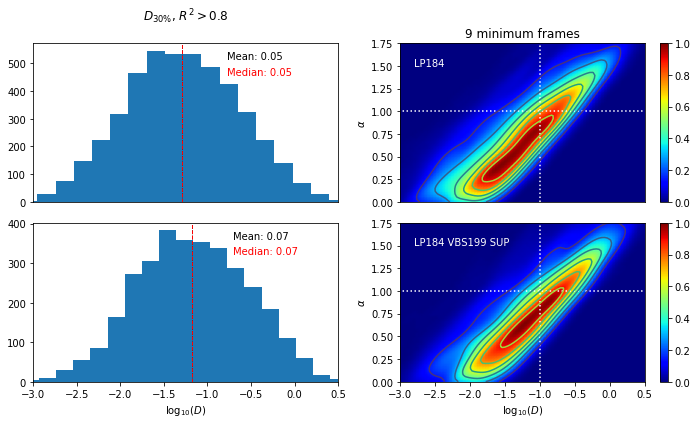

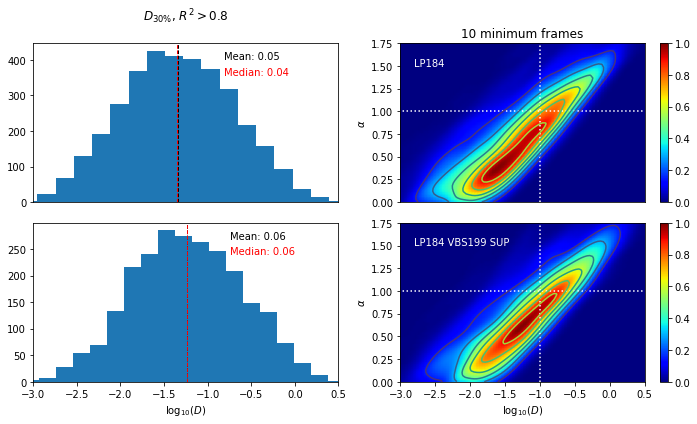

In [54]:
from scipy.stats import kde

maxframe=500
pt = [1,3] #if int first n points, if list of two values [n,m] -> [n:m]
r2 = 0.8
dt = 0.05

MinFrame = [9,10]
files1 = ["Data/SM1/sm1_ld400.csv","Data/SM2/sm2_ld400.csv","Data/SM3/sm3_ld400.csv","Data/SM4/sm4_ld400.csv","Data/SM5/sm5_ld400.csv","Data/SM6/sm6_ld400.csv","Data/SM7/sm7_ld400.csv","Data/SM8/sm8_ld400.csv","Data/SM9/sm9_ld400.csv","Data/SM10/sm10_ld400.csv"]
files2 = ["Data/SM1_WNT/sm1_wnt_ld400.csv","Data/SM2_WNT/sm2_wnt_ld400.csv","Data/SM3_WNT/sm3_wnt_ld400.csv","Data/SM4_WNT/sm4_wnt_ld400.csv","Data/SM5_WNT/sm5_wnt_ld400.csv","Data/SM6_WNT/sm6_wnt_ld400.csv","Data/SM7_WNT/sm7_wnt_ld400.csv","Data/SM8_WNT/sm8_wnt_ld400.csv","Data/SM10_WNT/sm10_wnt_ld400.csv"]

for minframe in MinFrame:
    
    DATA = data_pool(files1,dt,minframe,maxframe,r2,fit_option=pt)

    logD = []
    A = []
    for k in range(np.shape(DATA)[0]):
        logD.append(np.log10(DATA[k][1]))
        A.append(DATA[k][0])

        
    data1 = []
    for k in range(len(logD)):
        data1.append([logD[k],A[k]])
    data1 = np.array(data1)

    data = data1
    x, y = data.T
    nbins = 100
    k = kde.gaussian_kde(data.T)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    zi = np.array([l/max(zi) for l in zi])
    
    fig = plt.figure(figsize=(10,6))
    plt.subplot(2, 2, 2)
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap='jet')
    plt.vlines(-1,0,1.75,linestyles='dotted',colors='white')
    plt.hlines(1,-4,0.5,linestyles='dotted',colors='white')
    cbar = plt.colorbar()
    plt.contour(xi, yi, zi.reshape(xi.shape),cmap='viridis')
    plt.ylabel(r'$\alpha$')
    plt.xlim(-3,0.5)
    plt.ylim(0,1.75)
    plt.xticks([])
    plt.text(-2.8,1.5,'LP184',color='white')
    #plt.title(str(50*(pt-1))+' ms')
    plt.title(str(minframe)+' minimum frames')
    
    plt.subplot(2, 2, 1)
    plt.hist(logD,bins=20)
    plt.xlim(-3,0.5)    
    plt.xticks([])
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(np.average(logD), color='k', linestyle='dashed', linewidth=1)
    plt.text(np.average(logD)*0.6, max_ylim*0.9, 'Mean: {:.2f}'.format(round(10**(np.average(logD)),2)))
    plt.axvline(np.median(logD), color='r', linestyle='dashed', linewidth=1)
    plt.text(np.median(logD)*0.6, max_ylim*0.8, 'Median: {:.2f}'.format(round(10**(np.median(logD)),2)),color='r')
    if isinstance(pt,int):
        plt.title(r'$D_{'+str(round(pt*50,1))+' ms}$, $R^2 > $'+str(r2)+'\n')
    plt.title(r'$D_{30 \%}$, $R^2 > $'+str(r2)+'\n')   

    
    DATA = data_pool(files2,dt,minframe,maxframe,r2,fit_option=pt)

    logD = []
    A = []
    for k in range(np.shape(DATA)[0]):
        logD.append(np.log10(DATA[k][1]))
        A.append(DATA[k][0])

        
    data1 = []
    for k in range(len(logD)):
        data1.append([logD[k],A[k]])
    data1 = np.array(data1)

    data = data1
    x, y = data.T
    nbins = 100
    k = kde.gaussian_kde(data.T)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    zi = np.array([l/max(zi) for l in zi])
    
    plt.subplot(2, 2, 4)
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap='jet')
    plt.vlines(-1,0,1.75,linestyles='dotted',colors='white')
    plt.hlines(1,-4,0.5,linestyles='dotted',colors='white')
    cbar = plt.colorbar()
    plt.contour(xi, yi, zi.reshape(xi.shape),cmap='viridis')
    plt.xlabel(r'log$_{10}(D)$')
    plt.ylabel(r'$\alpha$')
    plt.xlim(-3,0.5)
    plt.ylim(0,1.75)
    plt.text(-2.8,1.5,'LP184 VBS199 SUP',color='white')
    #plt.title(str(50*(pt-1))+' ms')
    
    plt.subplot(2, 2, 3)
    plt.hist(logD,bins=20)
    plt.xlim(-3,0.5)
    plt.xlabel(r'log$_{10}(D)$')
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(np.average(logD), color='k', linestyle='dashed', linewidth=1)
    plt.text(np.average(logD)*0.6, max_ylim*0.9, 'Mean: {:.2f}'.format(round(10**(np.average(logD)),2)))
    plt.axvline(np.median(logD), color='r', linestyle='dashed', linewidth=1)
    plt.text(np.median(logD)*0.6, max_ylim*0.8, 'Median: {:.2f}'.format(round(10**(np.median(logD)),2)),color='r')
    
    
    plt.tight_layout()
    plt.show()

# SEABORN DATAFRAME ANALYSIS

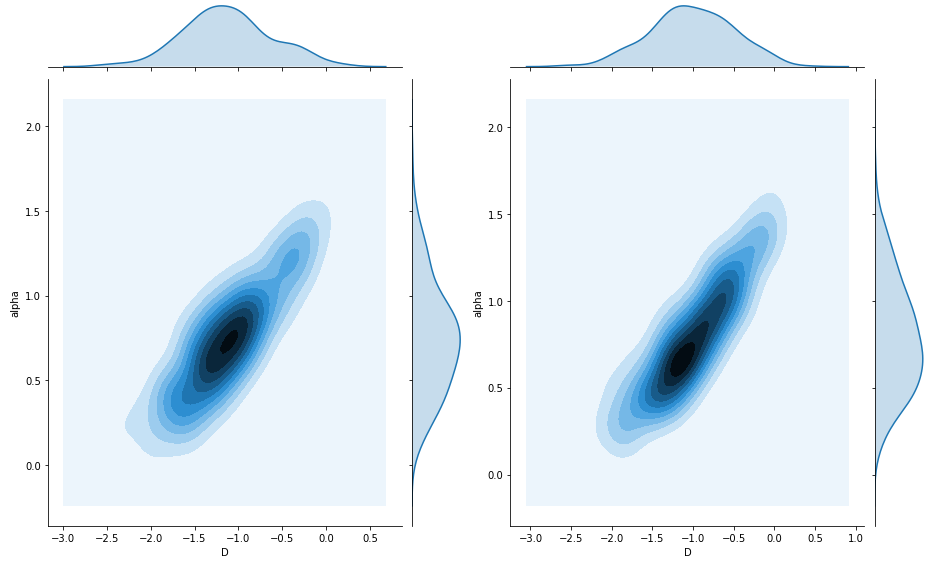

In [55]:
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy.stats import kde

maxframe=500
pt = "thirty_percent" #if int first n points, if list of two values [n,m] -> [n:m]
r2 = 0.8
dt = 0.05

MinFrame = [10]
#files1 = ["Data/SM1/sm1_ld400.csv","Data/SM2/sm2_ld400.csv","Data/SM3/sm3_ld400.csv","Data/SM4/sm4_ld400.csv","Data/SM5/sm5_ld400.csv","Data/SM6/sm6_ld400.csv","Data/SM7/sm7_ld400.csv","Data/SM8/sm8_ld400.csv","Data/SM9/sm9_ld400.csv","Data/SM10/sm10_ld400.csv"]
#files2 = ["Data/SM1_WNT/sm1_wnt_ld400.csv","Data/SM2_WNT/sm2_wnt_ld400.csv","Data/SM3_WNT/sm3_wnt_ld400.csv","Data/SM4_WNT/sm4_wnt_ld400.csv","Data/SM5_WNT/sm5_wnt_ld400.csv","Data/SM6_WNT/sm6_wnt_ld400.csv","Data/SM7_WNT/sm7_wnt_ld400.csv","Data/SM8_WNT/sm8_wnt_ld400.csv","Data/SM10_WNT/sm10_wnt_ld400.csv"]
files1 = ["Data/SM1/sm1_ld400.csv"]
files2 = ["Data/SM2_WNT/sm2_wnt_ld400.csv"]


for minframe in MinFrame:
    
    DATA1 = data_pool(files1,dt,minframe,maxframe,r2,fit_option=pt)

    logD1 = []
    A1 = []
    for k in range(np.shape(DATA1)[0]):
        logD1.append(np.log10(DATA1[k][1]))
        A1.append(DATA1[k][0])

        
    data1 = []
    for k in range(len(logD1)):
        data1.append([logD1[k],A1[k]])
        
    data1 = np.array(data1)

    df1 = pd.DataFrame(data1, columns=["D", "alpha"])
    
    g0 = sns.jointplot(x="D", y="alpha", data=df1, kind="kde")    
    
    DATA2 = data_pool(files2,dt,minframe,maxframe,r2,fit_option=pt)

    logD2 = []
    A2 = []
    for k in range(np.shape(DATA2)[0]):
        logD2.append(np.log10(DATA2[k][1]))
        A2.append(DATA2[k][0])

        
    data2 = []
    for k in range(len(logD2)):
        data2.append([logD2[k],A2[k]])
    data2 = np.array(data2)

    df2 = pd.DataFrame(data2, columns=["D", "alpha"])
    
    g1 = sns.jointplot(x="D", y="alpha", data=df2, kind="kde")
    
    fig = plt.figure(figsize=(13,8))
    gs = gridspec.GridSpec(1, 2)
    mg0 = sfg.SeabornFig2Grid(g0, fig, gs[0])
    mg1 = sfg.SeabornFig2Grid(g1, fig, gs[1])
    gs.tight_layout(fig)
    plt.show()

In [50]:
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy.stats import kde

maxframe=500
pt = "thirty_percent" #if int first n points, if list of two values [n,m] -> [n:m]
r2 = 0.8
dt = 0.05
minframe = 8

files1 = ["Data/SM1/sm1_ld400.csv","Data/SM2/sm2_ld400.csv","Data/SM3/sm3_ld400.csv","Data/SM4/sm4_ld400.csv","Data/SM5/sm5_ld400.csv","Data/SM6/sm6_ld400.csv","Data/SM7/sm7_ld400.csv","Data/SM8/sm8_ld400.csv","Data/SM9/sm9_ld400.csv","Data/SM10/sm10_ld400.csv"]
images1 = ["Data/SM1/sm1_stack.tif","Data/SM2/sm2_stack.tif","Data/SM3/sm3_stack.tif","Data/SM4/sm4_stack.tif","Data/SM5/sm5_stack.tif","Data/SM6/sm6_stack.tif","Data/SM7/sm7_stack.tif","Data/SM8/sm8_stack.tif","Data/SM9/sm9_stack.tif","Data/SM10/sm10_stack.tif"]

files2 = ["Data/SM1_WNT/sm1_wnt_ld400.csv","Data/SM2_WNT/sm2_wnt_ld400.csv","Data/SM3_WNT/sm3_wnt_ld400.csv","Data/SM4_WNT/sm4_wnt_ld400.csv","Data/SM5_WNT/sm5_wnt_ld400.csv","Data/SM6_WNT/sm6_wnt_ld400.csv","Data/SM7_WNT/sm7_wnt_ld400.csv","Data/SM8_WNT/sm8_wnt_ld400.csv","Data/SM10_WNT/sm10_wnt_ld400.csv"] 
images2 = ["Data/SM1_WNT/sm1_wnt_stack.tif","Data/SM2_WNT/sm2_wnt_stack.tif","Data/SM3_WNT/sm3_wnt_stack.tif","Data/SM4_WNT/sm4_wnt_stack.tif","Data/SM5_WNT/sm5_wnt_stack.tif","Data/SM6_WNT/sm6_wnt_stack.tif","Data/SM7_WNT/sm7_wnt_stack.tif","Data/SM8_WNT/sm8_wnt_stack.tif","Data/SM10_WNT/sm10_wnt_stack.tif"]

DATA1 = data_pool(files1,dt,minframe,maxframe,r2,fit_option=pt,images=images1)
DATA2 = data_pool(files2,dt,minframe,maxframe,r2,fit_option=pt,images=images2)

logD1 = []
A1 = []
C1 = []
N1 = []
I1 = []

for k in range(np.shape(DATA1)[0]):
    logD1.append(np.log10(DATA1[k][1]))
    A1.append(DATA1[k][0])
    C1.append(DATA1[k][2])
    N1.append(DATA1[k][3])
    I1.append(DATA1[k][7])
    
logD2 = []
A2 = []
C2 = []
N2 = []
I2 = []

for k in range(np.shape(DATA2)[0]):
    logD2.append(np.log10(DATA2[k][1]))
    A2.append(DATA2[k][0])
    C2.append(DATA2[k][2])
    N2.append(DATA2[k][3])
    I2.append(DATA2[k][7])

data = []
for k in range(len(logD1)):
    data.append([0,logD1[k],A1[k],C1[k],int(N1[k]),I1[k]])
for k in range(len(logD2)):
    data.append([1,logD2[k],A2[k],C2[k],int(N2[k]),I2[k]])

data = np.array(data)
df1 = pd.DataFrame(data, columns=["label","D", "A","C","N","I"])
df1.head()

,label,D,A,C,N,I
0,0.0,-0.894515,1.069329,0.320830,21.0,626.0
1,0.0,-1.009903,0.802589,0.062468,19.0,626.0
2,0.0,-1.629517,0.624280,0.037791,8.0,595.0
3,0.0,-1.278249,0.874875,0.094619,10.0,630.0
4,0.0,-1.503962,0.604148,0.349790,12.0,630.0


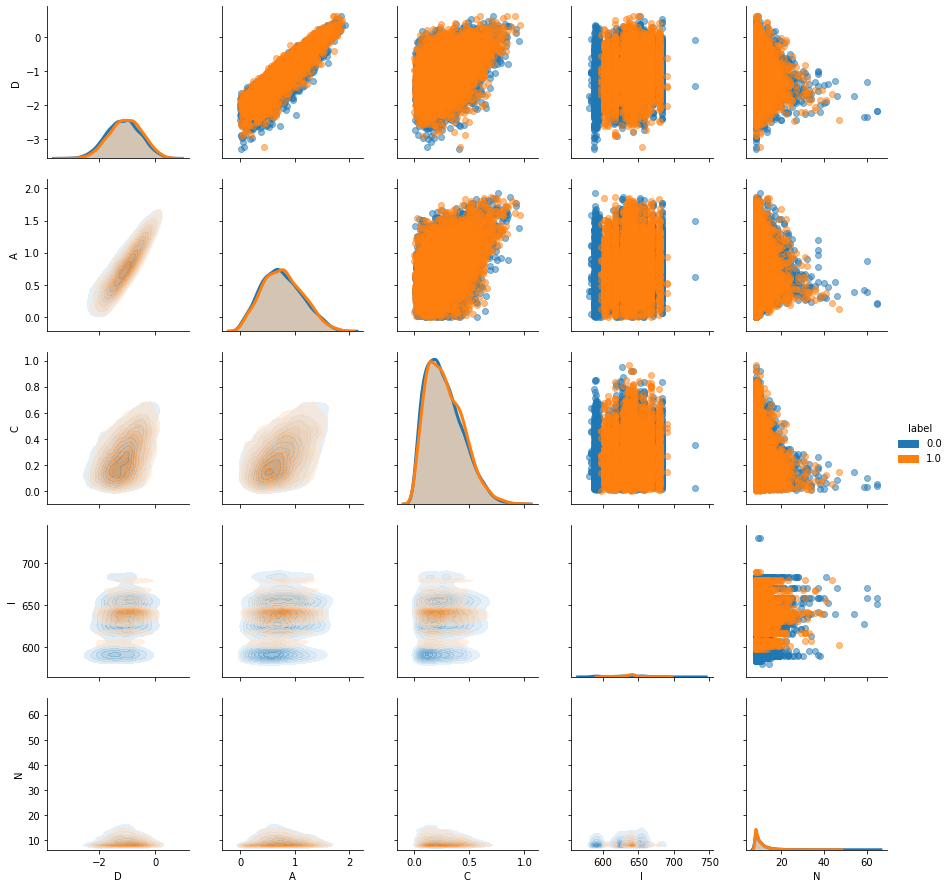

In [51]:
#sns.pairplot(df1,hue = "label",vars = ["D","A","C","N"], plot_kws={'alpha':0.8})

g = sns.PairGrid(df1,hue = "label",vars = ["D","A","C","I","N"])
g.map_upper(plt.scatter,alpha=0.5)
g.map_lower(sns.kdeplot,shade=True,shade_lowest=False,alpha=0.5)
g.map_diag(sns.kdeplot, lw=3,shade=True)
g.add_legend()